<a href="https://colab.research.google.com/github/Bess-Hub/Project-Citizen-Explorer/blob/main/Brazil_Lower_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Google Colab





---

*In this exercise we will explore the data provided by the Brazilian Lower House API using Google Colab, because I had issues with Jupyter.*




# Phase 1: Data Extraction


*As any Data Analysis project we will start with Data Extraction.*


Import modules:

In [1]:
import requests # To get the API URL
import pandas as pd # To test what I am learning on my course
import xml.etree.ElementTree as ET # Because so far it is my way of reading into XML files returned by an API
import matplotlib.pyplot as plt
import seaborn as sns

Define the API URL:

In [2]:
Base_URL = requests.get(url="https://www.camara.gov.br/SitCamaraWS/Deputados.asmx/ObterDeputados")

# Phase 2: Data Familiarization

Check the connection:

In [3]:
print(Base_URL)

<Response [200]>


Let's check what is the data we will be working with:

In [4]:
print(Base_URL.headers.get('content-type'))

text/xml; charset=utf-8


Since the data is in XML we will use ElementTree to create a local DataFrame from the API.

In [5]:
root = ET.fromstring(Base_URL.content) # Define the root channel to the content we want to append to our lists
# Create the lists
dep_name = []
dep_id = []
dep_foto = []
dep_uf = []
dep_gender = []
dep_part = []
# Add elements to the correspondent lists
for name in root.iter('nomeParlamentar'):
    dep_name.append(name.text)
for id in root.iter('ideCadastro'):
    dep_id.append(id.text)
for urlFoto in root.iter('urlFoto'):
    dep_foto.append(urlFoto.text)
for uf in root.iter('uf'):
    dep_uf.append(uf.text)
for sexo in root.iter('sexo'):
    dep_gender.append(sexo.text)
for part in root.iter('partido'):
    dep_part.append(part.text)

Now we create one dataframe using Pandas.

In [6]:
Deputados = pd.DataFrame({'Name': dep_name, 'ID': dep_id, 'Foto': dep_foto, 'UF': dep_uf, 'Gender': dep_gender, 'Party': dep_part})

In [7]:
# Rows and columns
print(f"There are", len(Deputados), "rows and there are", len(Deputados.columns), "columns")

There are 512 rows and there are 6 columns


# Phase 3: Visualizing the Data

If we give the folowing command we can see line by line each congressperson information in our DataFrame. These are the first 5 entries:

In [8]:
Deputados.head()

,Name,ID,Foto,UF,Gender,Party
0,Benedita da Silva,73701,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PT
1,Átila Lins,74090,http://www.camara.gov.br/internet/deputado/ban...,AM,masculino,PSD
2,Renildo Calheiros,73801,http://www.camara.gov.br/internet/deputado/ban...,PE,masculino,PCdoB
3,Jandira Feghali,74848,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PCdoB
4,Lídice da Mata,139285,http://www.camara.gov.br/internet/deputado/ban...,BA,feminino,PSB


We could wish to select only the first 10, for example:

In [9]:
Deputados.head(10)

,Name,ID,Foto,UF,Gender,Party
0,Benedita da Silva,73701,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PT
1,Átila Lins,74090,http://www.camara.gov.br/internet/deputado/ban...,AM,masculino,PSD
2,Renildo Calheiros,73801,http://www.camara.gov.br/internet/deputado/ban...,PE,masculino,PCdoB
3,Jandira Feghali,74848,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PCdoB
4,Lídice da Mata,139285,http://www.camara.gov.br/internet/deputado/ban...,BA,feminino,PSB
5,Júlio Cesar,74317,http://www.camara.gov.br/internet/deputado/ban...,PI,masculino,PSD
6,Claudio Cajado,74537,http://www.camara.gov.br/internet/deputado/ban...,BA,masculino,PP
7,Elcione Barbalho,74075,http://www.camara.gov.br/internet/deputado/ban...,PA,feminino,MDB
8,Arlindo Chinaglia,73433,http://www.camara.gov.br/internet/deputado/ban...,SP,masculino,PT
9,Mendonça Filho,74428,http://www.camara.gov.br/internet/deputado/ban...,PE,masculino,UNIÃO


Or we could wish to select only the ones from a specific UF (acronym for State in Portuguese), for example Paraná is represented by PR

In [10]:
Deputados.loc[Deputados['UF'] == 'PR']

,Name,ID,Foto,UF,Gender,Party
10,Dilceu Sperafico,73768,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PP
29,Giacobo,74383,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PL
97,Zeca Dirceu,160592,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PT
110,Luiz Nishimori,162332,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PSD
144,Aliel Machado,178927,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PV
145,Diego Garcia,178929,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,REPUBLICANOS
146,Luciano Ducci,178931,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PSB
147,Sergio Souza,178933,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,MDB
148,Toninho Wandscheer,178934,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PP
175,Sargento Fahur,204387,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PSD


# Phase 4: Checking for Missing Data

To verify if we have any missing data by asking for ```info().```

In [11]:
Deputados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    512 non-null    object
 1   ID      512 non-null    object
 2   Foto    512 non-null    object
 3   UF      512 non-null    object
 4   Gender  512 non-null    object
 5   Party   512 non-null    object
dtypes: object(6)
memory usage: 24.1+ KB



Do you see how each column has the same number of elements: 513?

<br>Knowing that there should be 513 Congresspersons, it seems that there is no missing information.



We could also request to describe the UF's, although the result should not bring any new information:
<br> 
*   There should be 513 Congresspersons.
*   Brazil has 26 UF's + the Federal District, so it should be 27 unique UF's.
*   Sao Paulo is the state with more congresspersons.
<br>
*What about those that are temporarily replacing a congressperson, would they be added to this list?*

In [12]:
Deputados['UF'].describe()

count     512
unique     27
top        SP
freq       70
Name: UF, dtype: object

But we can also want to see how they are gender distributed:

In [13]:
Deputados['Gender'].value_counts()

masculino    425
feminino      87
Name: Gender, dtype: int64

And make a pie chart of it:

<Axes: ylabel='Gender'>

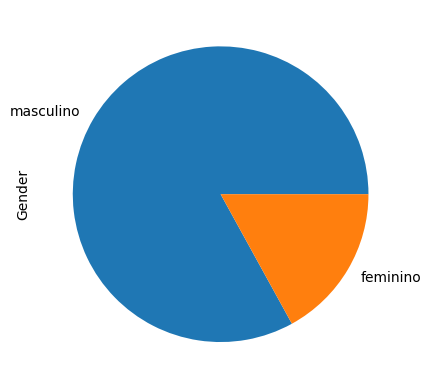

In [14]:
Deputados['Gender'].value_counts().plot(kind="pie")

# Phase 5: Adding More Data and Cleaning

Let's use another endpoint to retrieve information such as the birth date and the level of studies of each congressperson. <br> So we start by creating a list for each element.
<br><br>
The API endpoint where this information comes from has a static portion and a dynamic portion, let's have the Static portion declared:

In [15]:
bdate = []
studies = []

Static_URL = "https://dadosabertos.camara.leg.br/api/v2/deputados/"



*   The dynamic portion of the URL is the ID of each congressperson.
*   So, for every element in ID - that we will call i - we will get a specific URL (i_URL).
*   Run a requests.get on this i_URL and get the text/xml data.
*   Using ET we will get the content of the xml.
*   Now we just extract the data we want and append it to the correspondent list.

In [16]:
for i in Deputados['ID']:
    i_URL = Static_URL + str(i)
    response = requests.get(url=i_URL, headers={'Accept': 'text/xml'})
    root2 = ET.fromstring(response.content)
    for data in root2.iter('dataNascimento'):
      bdate.append(data.text)
    for info in root2.iter('escolaridade'):
      studies.append(info.text)

Just like with our previous data frame, create a dictionary that contains the values extracted. <br><br> Add the ID column so it is used as reference to join the Deputados dictionary with the new_df correctly.

In [17]:
new_df = pd.DataFrame({'ID': dep_id, 'Birthdate': bdate, 'Scolarity': studies})

In [18]:
Deputados = Deputados.join(new_df, lsuffix="_left", rsuffix="_right", how='left')

Now our Deputados dataframe is bigger!

In [19]:
Deputados.head()

,Name,ID_left,Foto,UF,Gender,Party,ID_right,Birthdate,Scolarity
0,Benedita da Silva,73701,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PT,73701,1942-04-26,Superior
1,Átila Lins,74090,http://www.camara.gov.br/internet/deputado/ban...,AM,masculino,PSD,74090,1950-11-22,Superior
2,Renildo Calheiros,73801,http://www.camara.gov.br/internet/deputado/ban...,PE,masculino,PCdoB,73801,1959-04-20,Superior
3,Jandira Feghali,74848,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PCdoB,74848,1957-05-17,Pós-Graduação
4,Lídice da Mata,139285,http://www.camara.gov.br/internet/deputado/ban...,BA,feminino,PSB,139285,1956-03-12,Superior


But there ar some missing values...

In [20]:
print(Deputados.isnull().sum())

Name          0
ID_left       0
Foto          0
UF            0
Gender        0
Party         0
ID_right      0
Birthdate     0
Scolarity    56
dtype: int64


If we can call the entries without data we can run

```
Deputados[Deputados.isnull().any(axis=1)]
```

In order to verify correlations we must have the columns as intergers or floats.

Let's assign a code system for the genders by creating a column Gender_Code / Scolarity_Code / Party_Code.

By assigning a code to Scolarity we will deal with the missing values.

In [21]:
Deputados['Gender_Code'] = 0

Deputados.loc[Deputados['Gender'] == 'feminino', 'Gender_Code'] = 1

In [22]:
Deputados['Scolarity_Code'] = 0

Deputados.loc[Deputados['Scolarity'] == 'Doutorado', 'Scolarity_Code'] = 13
Deputados.loc[Deputados['Scolarity'] == 'Doutorado Incompleto', 'Scolarity_Code'] = 12
Deputados.loc[Deputados['Scolarity'] == 'Mestrado', 'Scolarity_Code'] = 11
Deputados.loc[Deputados['Scolarity'] == 'Mestrado Incompleto', 'Scolarity_Code'] = 10
Deputados.loc[Deputados['Scolarity'] == 'Superior', 'Scolarity_Code'] = 9
Deputados.loc[Deputados['Scolarity'] == 'Superior Incompleto', 'Scolarity_Code'] = 8
Deputados.loc[Deputados['Scolarity'] == 'Ensino Médio', 'Scolarity_Code'] = 7
Deputados.loc[Deputados['Scolarity'] == 'Secundário', 'Scolarity_Code'] = 6
Deputados.loc[Deputados['Scolarity'] == 'Ensino Médio Incompleto', 'Scolarity_Code'] = 5
Deputados.loc[Deputados['Scolarity'] == 'Ensino Fundamental', 'Scolarity_Code'] = 4
Deputados.loc[Deputados['Scolarity'] == 'Primário', 'Scolarity_Code'] = 3
Deputados.loc[Deputados['Scolarity'] == 'Ensino Fundamental Incompleto', 'Scolarity_Code'] = 2
Deputados.loc[Deputados['Scolarity'] == 'Primário Incompleto', 'Scolarity_Code'] = 1

In [23]:
Deputados['Party_Code'] = 0

Deputados.loc[Deputados['Party_Code'] == 'PL', 'Party_Code'] = 22
Deputados.loc[Deputados['Party_Code'] == 'PT', 'Party_Code'] = 13
Deputados.loc[Deputados['Party_Code'] == 'UNIÃO', 'Party_Code'] = 44
Deputados.loc[Deputados['Party_Code'] == 'PP', 'Party_Code'] = 11
Deputados.loc[Deputados['Party_Code'] == 'PSD', 'Party_Code'] = 55
Deputados.loc[Deputados['Party_Code'] == 'MDB', 'Party_Code'] = 15
Deputados.loc[Deputados['Party_Code'] == 'REPUBLICANOS', 'Party_Code'] = 10
Deputados.loc[Deputados['Party_Code'] == 'PDT', 'Party_Code'] = 12
Deputados.loc[Deputados['Party_Code'] == 'PSB', 'Party_Code'] = 40
Deputados.loc[Deputados['Party_Code'] == 'PSDB', 'Party_Code'] = 45
Deputados.loc[Deputados['Party_Code'] == 'PSOL', 'Party_Code'] = 50
Deputados.loc[Deputados['Party_Code'] == 'PODE', 'Party_Code'] = 19
Deputados.loc[Deputados['Party_Code'] == 'PCdoB', 'Party_Code'] = 65
Deputados.loc[Deputados['Party_Code'] == 'AVANTE', 'Party_Code'] = 70
Deputados.loc[Deputados['Party_Code'] == 'PV', 'Party_Code'] = 43
Deputados.loc[Deputados['Party_Code'] == 'CIDADANIA', 'Party_Code'] = 23
Deputados.loc[Deputados['Party_Code'] == 'SOLIDARIEDADE', 'Party_Code'] = 77
Deputados.loc[Deputados['Party_Code'] == 'PATRIOTA', 'Party_Code'] = 51
Deputados.loc[Deputados['Party_Code'] == 'PSC', 'Party_Code'] = 20
Deputados.loc[Deputados['Party_Code'] == 'NOVO', 'Party_Code'] = 30
Deputados.loc[Deputados['Party_Code'] == 'REDE', 'Party_Code'] = 18


We do not want duplicated columns, so let's drop the ID_right column:

In [24]:
Deputados.drop('ID_right', inplace=True, axis=1)

Let's rename the ID_left column name to ID:

In [25]:
Deputados.rename(columns={"ID_left": "ID"})

,Name,ID,Foto,UF,Gender,Party,Birthdate,Scolarity,Gender_Code,Scolarity_Code,Party_Code
0,Benedita da Silva,73701,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PT,1942-04-26,Superior,1,9,0
1,Átila Lins,74090,http://www.camara.gov.br/internet/deputado/ban...,AM,masculino,PSD,1950-11-22,Superior,0,9,0
2,Renildo Calheiros,73801,http://www.camara.gov.br/internet/deputado/ban...,PE,masculino,PCdoB,1959-04-20,Superior,0,9,0
3,Jandira Feghali,74848,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PCdoB,1957-05-17,Pós-Graduação,1,0,0
4,Lídice da Mata,139285,http://www.camara.gov.br/internet/deputado/ban...,BA,feminino,PSB,1956-03-12,Superior,1,9,0
...,...,...,...,...,...,...,...,...,...,...,...
507,Welter,224333,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PT,1968-11-23,Superior,0,9,0
508,Reinhold Stephanes,205865,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PSD,1965-07-26,Superior,0,9,0
509,Luciano Alves,138286,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PSD,1973-01-08,None,0,0,0
510,Caio Vianna,143942,http://www.camara.gov.br/internet/deputado/ban...,RJ,masculino,PSD,1988-12-08,None,0,0,0


Looking way better! Let's just adjust that Birthdate column is a datetime type, not object - This will be important for the future.

In [26]:
Deputados['Birthdate'] = pd.to_datetime(Deputados['Birthdate'])

And with birth date adjusted, we can calculate the age of each congressperson.

In [27]:
age = []

from datetime import date, timedelta

for date in Deputados['Birthdate']:
  result = (date.today() - date) // timedelta(days=365.2425)
  age.append(result)

In [28]:
join_age = pd.DataFrame({'ID': dep_id, 'Age': age})

In [29]:
Deputados = Deputados.join(join_age, lsuffix="_left", rsuffix="_right", how='left')
Deputados.drop('ID_left', inplace=True, axis=1)

In [30]:
Deputados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            512 non-null    object        
 1   Foto            512 non-null    object        
 2   UF              512 non-null    object        
 3   Gender          512 non-null    object        
 4   Party           512 non-null    object        
 5   Birthdate       512 non-null    datetime64[ns]
 6   Scolarity       456 non-null    object        
 7   Gender_Code     512 non-null    int64         
 8   Scolarity_Code  512 non-null    int64         
 9   Party_Code      512 non-null    int64         
 10  ID              512 non-null    object        
 11  Age             512 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 48.1+ KB


# Phase 5: Data Visualization

Now we can see the average age of a congressperson, the oldest and the youngest as well.

In [31]:
print("The average congressperson age is:", Deputados["Age"].mean(), "years old.")
print("The oldest congressperson age is:", Deputados["Age"].max(), "years old.")
print("The youngest congressperson age is:", Deputados["Age"].min(), "years old.")

The average congressperson age is: 50.458984375 years old.
The oldest congressperson age is: 88 years old.
The youngest congressperson age is: 22 years old.


This is the average age of congresspersons per political party:



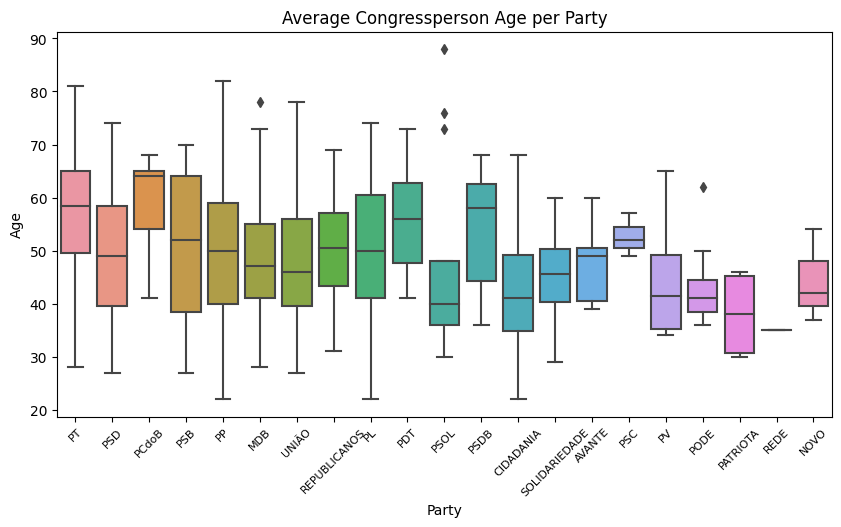

In [32]:
print("This is the average age of congresspersons per political party:")
print()
plt.figure(figsize=(10, 5))
sns.boxplot(x='Party', y='Age', data=Deputados)
plt.title('Average Congressperson Age per Party')
plt.xlabel('Party')
plt.ylabel('Age')
plt.xticks(rotation=45, size=8)
plt.show()

This is the average age of congresspersons per State:



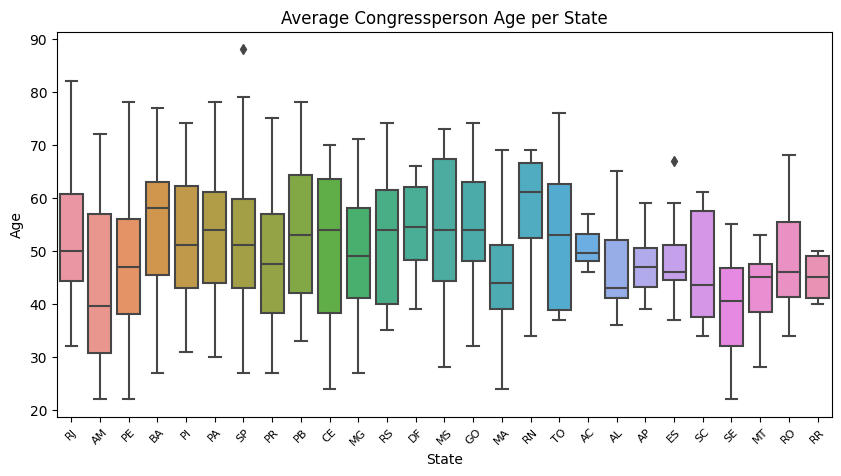

In [33]:
print("This is the average age of congresspersons per State:")
print()
plt.figure(figsize=(10, 5))
sns.boxplot(x='UF', y='Age', data=Deputados)
plt.title('Average Congressperson Age per State')
plt.xlabel('State')
plt.ylabel('Age')
plt.xticks(rotation=45, size=8)
plt.show()

This is the average age of congresspersons per gender:



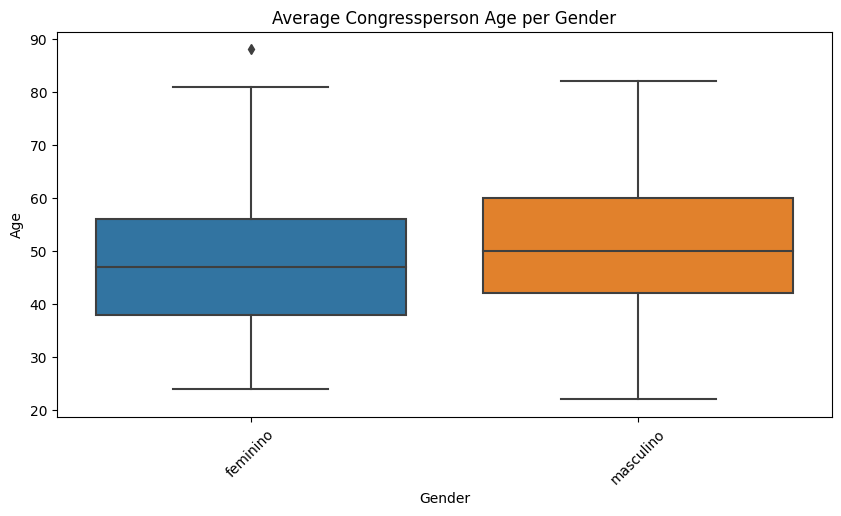

In [34]:
print("This is the average age of congresspersons per gender:")
print()
plt.figure(figsize=(10, 5))
sns.boxplot(x='Gender', y='Age', data=Deputados)
plt.title('Average Congressperson Age per Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

This is another way of visualizing the same information:



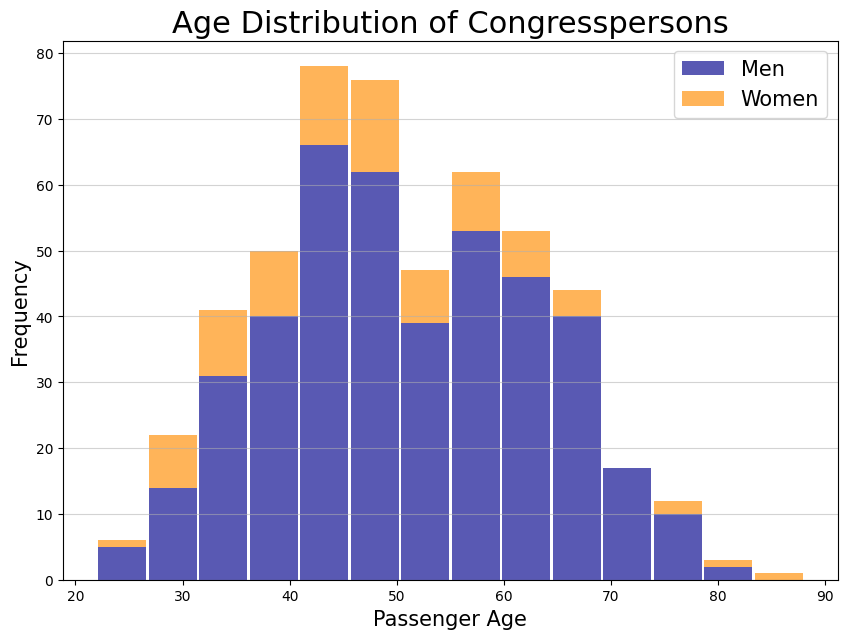

In [35]:
print("This is another way of visualizing the same information:")
print()
fig, ax = plt.subplots(figsize=(10,7))
Men = Deputados[Deputados['Gender_Code']==0]['Age']
Women = Deputados[Deputados['Gender_Code']==1]['Age']
n, bins, patches = plt.hist(x = [Men, Women], 
                            stacked = True, bins='auto', 
                            color=['darkblue', 'darkorange'],
                            alpha=0.65, rwidth=0.95)
plt.grid(axis='y', alpha=0.55)
plt.xlabel('Passenger Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age Distribution of Congresspersons', fontsize = 22)
plt.legend(['Men','Women'], fontsize = 15);

This is an attempt of verifying correlation, but no significant correlatrion was found:



<ipython-input-43-2168f6ce66f6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = Deputados.corr()


<Axes: >

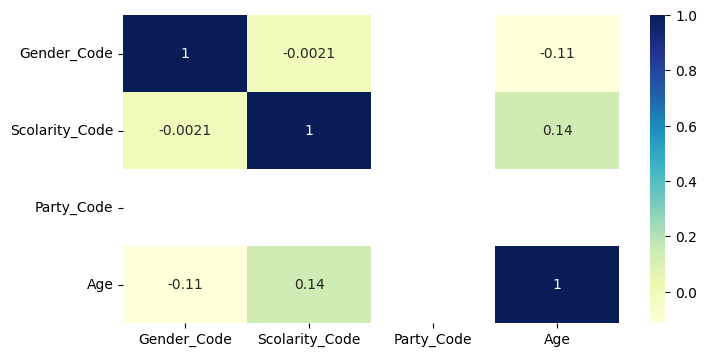

In [43]:
print("This is an attempt of verifying correlation, but no significant correlatrion was found:")
print()
matrix_corr = Deputados.corr()
plt.figure(figsize=(8,4))
sns.heatmap(matrix_corr, annot=True, cmap='YlGnBu')